In [2]:
import sys
sys.path.append("../../src")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
REPORT = True
if REPORT:
    sns.set(font_scale=1.5)

## Load and preprocess data

In [6]:
import data

In [7]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "00_comprehension_swarm-construction-meaning") & (raw_df.trial_type == "html-slider-response-with-copout")]
# HACK: concat in trials which were missing experiment_id annotation. oops.
response_df = pd.concat([response_df,
                         raw_df[(raw_df.trial_type == "html-slider-response-with-copout") & raw_df.experiment_id.isna() & (raw_df.dateTime < 1628370478823)]])

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [8]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [9]:
# Convert condition_id to independent features
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [10]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [11]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [12]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_answer,slider_value,slider_copout,response,image_copout,condition_0,condition_1,condition_2,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
9,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,2919.8,0.0-9.0,2021-08-03 16:54:06.757,00_comprehension_swarm-construction-meaning,...,NaN,77.0,False,NaN,NaN,0.0,1.0,NaN,True,-0.186210
10,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,2236.0,0.0-10.0,2021-08-03 16:54:08.995,00_comprehension_swarm-construction-meaning,...,NaN,81.0,False,NaN,NaN,0.0,1.0,NaN,True,0.623400
11,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,2597.8,0.0-11.0,2021-08-03 16:54:11.594,00_comprehension_swarm-construction-meaning,...,NaN,85.0,False,NaN,NaN,0.0,0.0,NaN,False,1.433010
12,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,2699.9,0.0-12.0,2021-08-03 16:54:14.296,00_comprehension_swarm-construction-meaning,...,NaN,82.0,False,NaN,NaN,0.0,0.0,NaN,False,0.825803
13,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,2428.1,0.0-13.0,2021-08-03 16:54:16.729,00_comprehension_swarm-construction-meaning,...,NaN,79.0,False,NaN,NaN,filler,full,NaN,False,0.218595


In [13]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [14]:
len(response_df.reset_index().uniqueid.unique())

63

### Demo

In [15]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[raw_df.trial_type.isin(("survey-text", "survey-multi-choice")) & (raw_df.dateTime <= 1628370478823)]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

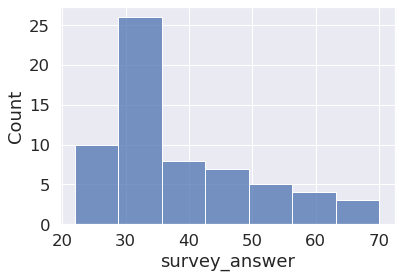

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree               41
Master's degree                 10
Some college                     7
High school/GED                  4
Did not complete high school     1
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    62
No      1
Name: survey_answer, dtype: int64

### Comments

In [19]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
31           A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB                                         Good
             A3A3R002WFC7U3:3SLE99ER0O1YVMZDFSNQWHQ2FQCBZ3                                         none
             A2KGELV8JP76TJ:3JV9LGBJWU2INZTHT54NHUAVBZ1OGV    Nice task and thanks for the opportunity.
             AJQ71YIGY01HZ:3OLQQLKKNTD62A6T7XMU9V8XZPCEJL                                              
             A3N4CI434GNSZP:3M68NM076IVJNJWR9KC5ZY2BS8IR65                   very interesting and nice 
                                                                                ...                    
39           A1FVXS8IM5QYO8:3HHRAGRYX9T38P69FZYDPDO880DO94                       Interesting experiment
             A2Y87M8V0N1M6P:3OONKJ5DKD7MWIL6DJC9GJJYW0GOBE                                             
             A3SICS54QB7FNA:3U8YCDAGXQ4OX7VCUG7OL7IFKX20QD                                         NICE
     

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

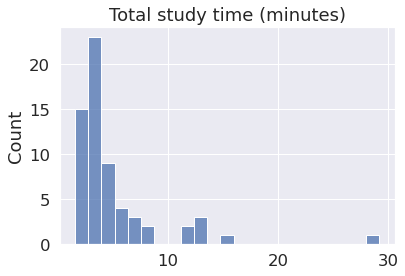

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.025523
std     4.347083
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

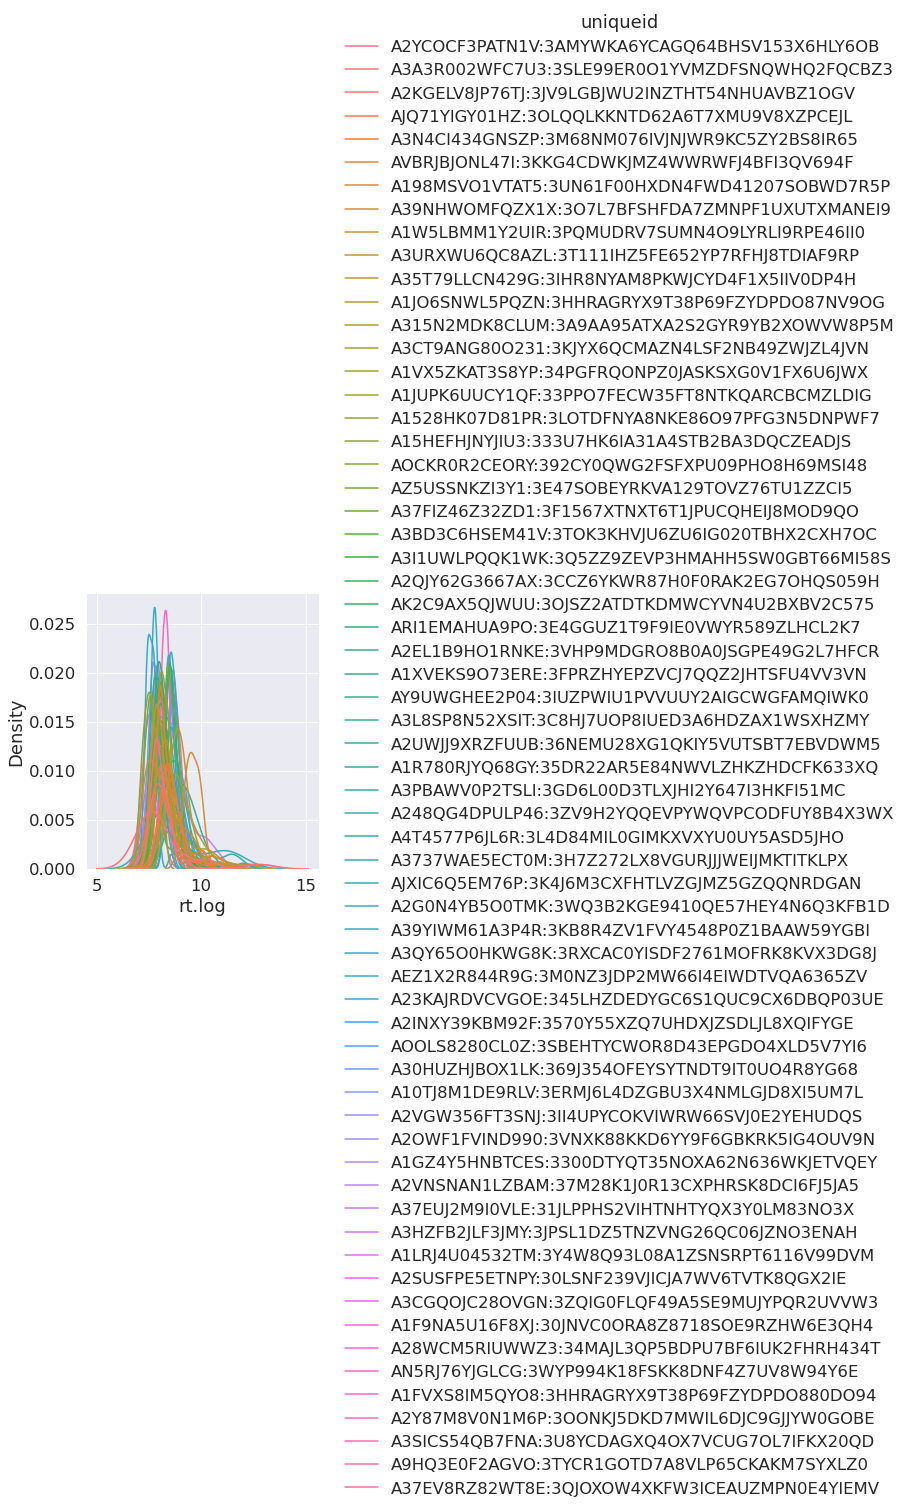

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

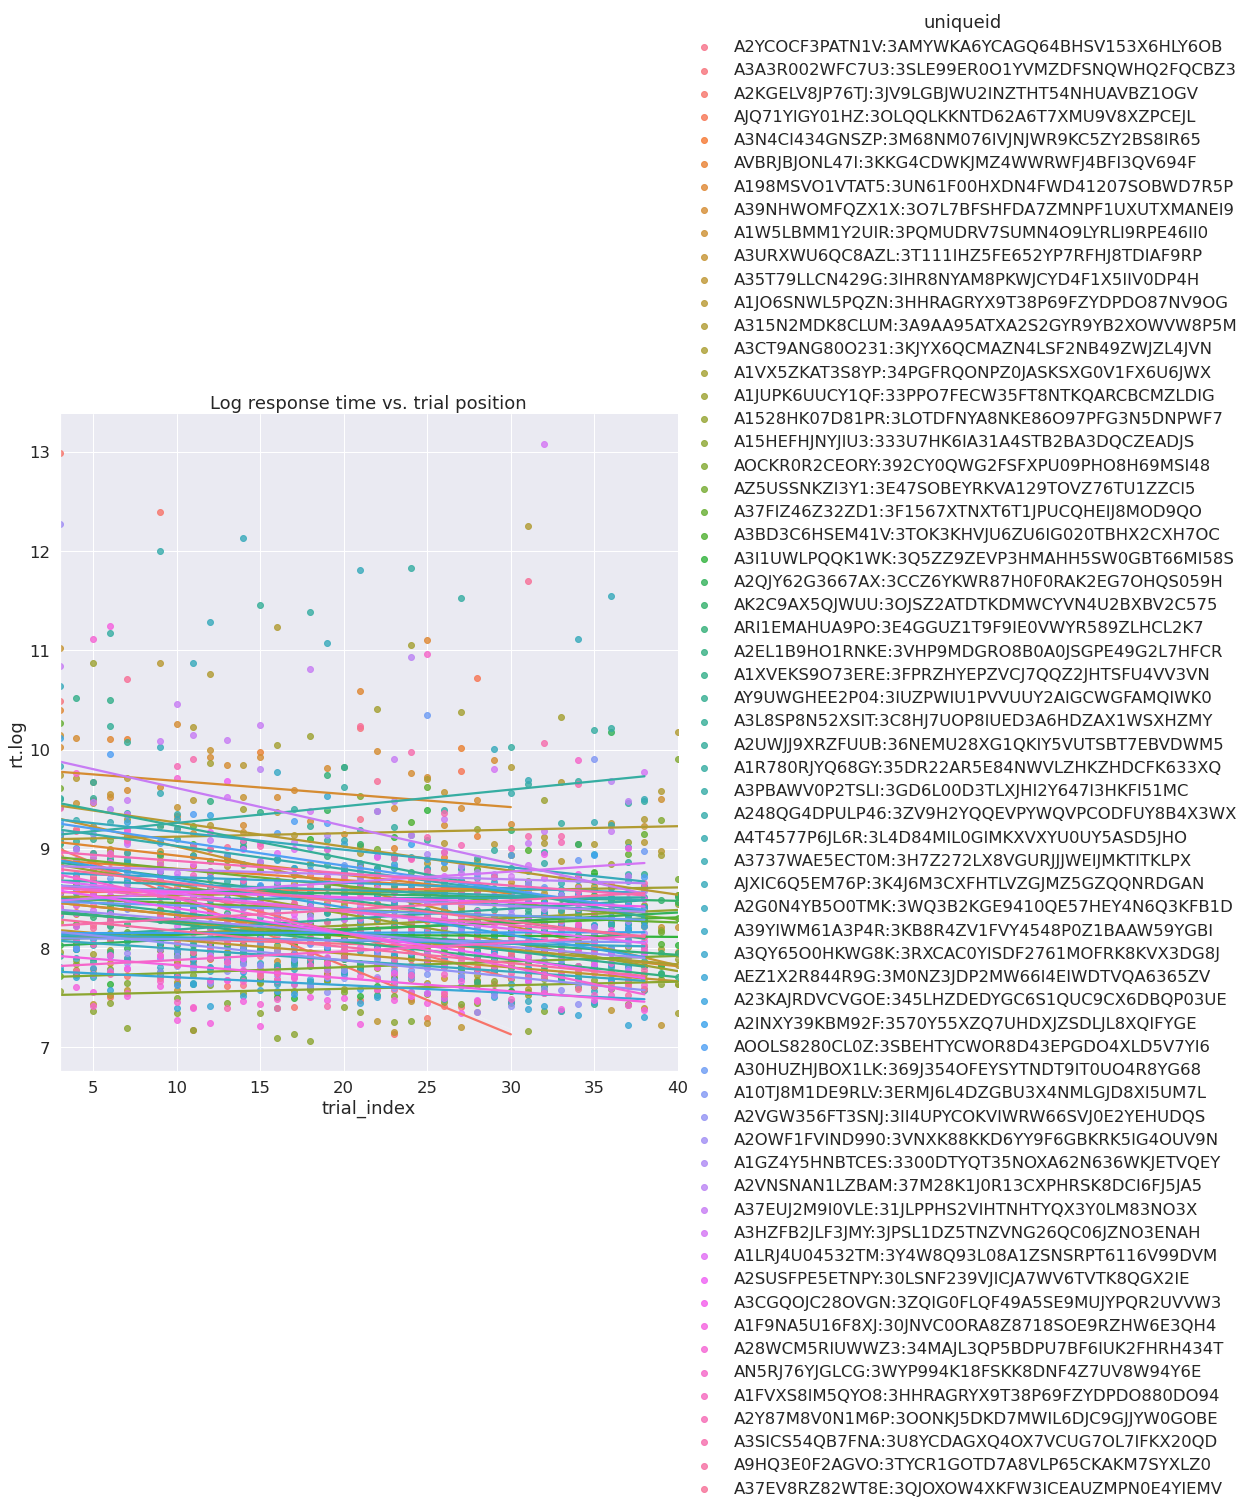

In [24]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

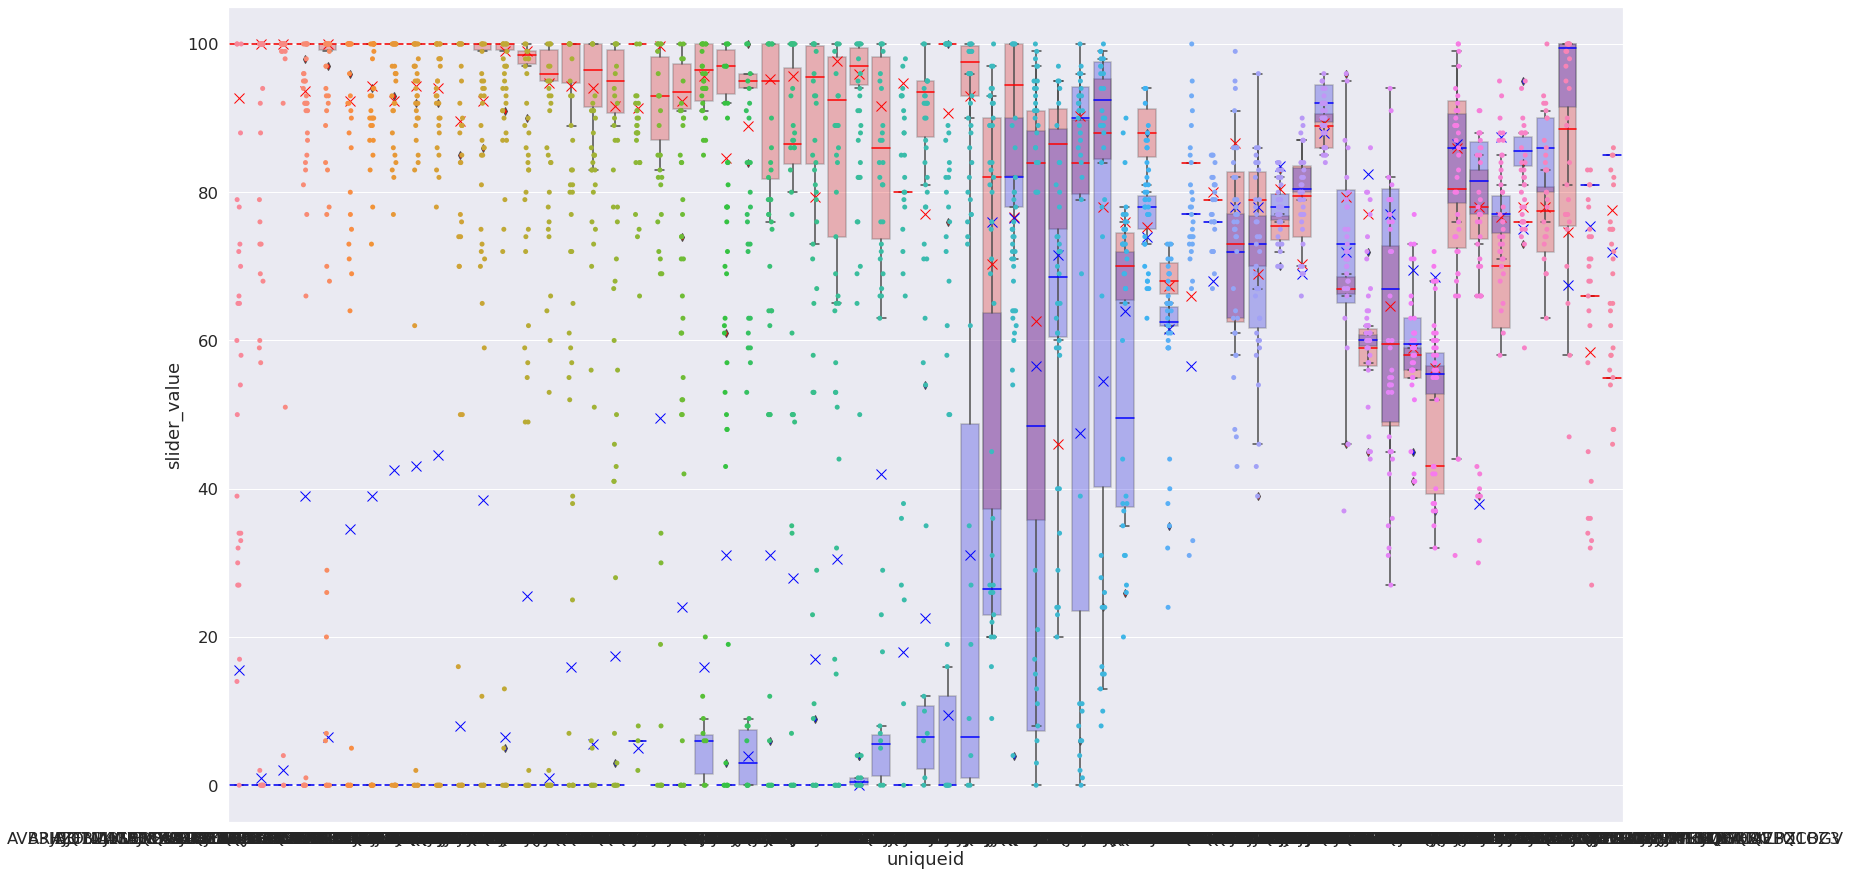

In [25]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

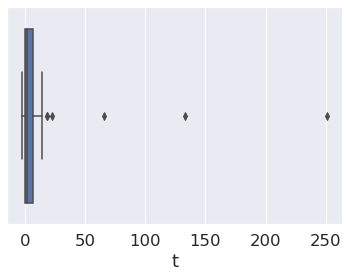

In [26]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    
    # Filter out copouts (and print warning -- practice should not trigger copout)
    copout_rows = practice_rows[practice_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {practice_rows.iloc[0].name} had {len(copout_rows)} practice copout(s). Seems fishy.")
    practice_rows = practice_rows[~practice_rows.slider_copout]
    
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.boxplot(data=practice_stats.reset_index(), x="t", hue="uniqueid")

In [27]:
practice_stats.sort_values("t")

,t,pval
uniqueid,,
A1F9NA5U16F8XJ:30JNVC0ORA8Z8718SOE9RZHW6E3QH4,-2.004353,1.387396e-01
A35T79LLCN429G:3IHR8NYAM8PKWJCYD4F1X5IIV0DP4H,-1.987219,1.410644e-01
A1W5LBMM1Y2UIR:3PQMUDRV7SUMN4O9LYRLI9RPE46II0,-1.820340,1.662642e-01
AOCKR0R2CEORY:392CY0QWG2FSFXPU09PHO8H69MSI48,-1.600735,2.077475e-01
A15HEFHJNYJIU3:333U7HK6IA31A4STB2BA3DQCZEADJS,-1.288124,2.880632e-01
...,...,...
A1XVEKS9O73ERE:3FPRZHYEPZVCJ7QQZ2JHTSFU4VV3VN,250.886827,1.396408e-07
A2EL1B9HO1RNKE:3VHP9MDGRO8B0A0JSGPE49G2L7HFCR,NaN,NaN
A2SUSFPE5ETNPY:30LSNF239VJICJA7WV6TVTK8QGX2IE,NaN,NaN


#### Practice copouts

In [28]:
response_df[response_df.condition_0 == "practice"].groupby(["condition_1", "condition_2"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

mean  count
condition_1 condition_2                 
solid       full         0.079365     63
liquid      full         0.047619     63
solid       empty        0.031746     63
abstract    empty        0.015873     63
            full         0.000000     63

### Fillers

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

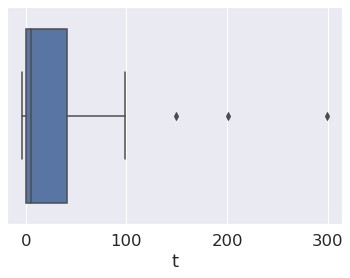

In [29]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [30]:
filler_stats.sort_values("t")

,t,pval
uniqueid,,
A2VGW356FT3SNJ:3II4UPYCOKVIWRW66SVJ0E2YEHUDQS,-3.378429,0.008147
A2SUSFPE5ETNPY:30LSNF239VJICJA7WV6TVTK8QGX2IE,-1.843960,0.107717
A1F9NA5U16F8XJ:30JNVC0ORA8Z8718SOE9RZHW6E3QH4,-1.774153,0.106433
A1JUPK6UUCY1QF:33PPO7FECW35FT8NTKQARCBCMZLDIG,-1.618561,0.136612
AOCKR0R2CEORY:392CY0QWG2FSFXPU09PHO8H69MSI48,-1.275368,0.231010
...,...,...
A39NHWOMFQZX1X:3O7L7BFSHFDA7ZMNPF1UXUTXMANEI9,NaN,NaN
A3A3R002WFC7U3:3SLE99ER0O1YVMZDFSNQWHQ2FQCBZ3,NaN,NaN
A3N4CI434GNSZP:3M68NM076IVJNJWR9KC5ZY2BS8IR65,NaN,NaN


#### Filler copouts

In [31]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,,mean,count
item_id,condition_1,,
3.0,empty,0.035714,56
7.0,full,0.035088,57
10.0,full,0.018182,55
6.0,full,0.017857,56
8.0,full,0.017857,56
1.0,empty,0.017544,57
0.0,empty,0.000000,56
2.0,empty,0.000000,57
4.0,empty,0.000000,57


## Final data processing

In [32]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [33]:
practice_drops = practice_stats[(practice_stats.t < 0) | (practice_stats.pval > 1e-1) | practice_stats.t.isna()]
drop_pct = np.round(len(practice_drops) / len(practice_stats.index) * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

34 subjects (54.0%) disqualified and dropped due to failed practice.
	A10TJ8M1DE9RLV:3ERMJ6L4DZGBU3X4NMLGJD8XI5UM7L
	A1528HK07D81PR:3LOTDFNYA8NKE86O97PFG3N5DNPWF7
	A15HEFHJNYJIU3:333U7HK6IA31A4STB2BA3DQCZEADJS
	A1F9NA5U16F8XJ:30JNVC0ORA8Z8718SOE9RZHW6E3QH4
	A1JO6SNWL5PQZN:3HHRAGRYX9T38P69FZYDPDO87NV9OG
	A1JUPK6UUCY1QF:33PPO7FECW35FT8NTKQARCBCMZLDIG
	A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX
	A1W5LBMM1Y2UIR:3PQMUDRV7SUMN4O9LYRLI9RPE46II0
	A28WCM5RIUWWZ3:34MAJL3QP5BDPU7BF6IUK2FHRH434T
	A2EL1B9HO1RNKE:3VHP9MDGRO8B0A0JSGPE49G2L7HFCR
	A2KGELV8JP76TJ:3JV9LGBJWU2INZTHT54NHUAVBZ1OGV
	A2OWF1FVIND990:3VNXK88KKD6YY9F6GBKRK5IG4OUV9N
	A2QJY62G3667AX:3CCZ6YKWR87H0F0RAK2EG7OHQS059H
	A2SUSFPE5ETNPY:30LSNF239VJICJA7WV6TVTK8QGX2IE
	A2UWJJ9XRZFUUB:36NEMU28XG1QKIY5VUTSBT7EBVDWM5
	A2VGW356FT3SNJ:3II4UPYCOKVIWRW66SVJ0E2YEHUDQS
	A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB
	A35T79LLCN429G:3IHR8NYAM8PKWJCYD4F1X5IIV0DP4H
	A3737WAE5ECT0M:3H7Z272LX8VGURJJJWEIJMKTITKLPX
	A37FIZ46Z32ZD1:3F1567XTNXT6T1JPUCQHEI

In [34]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

24 subjects remaining.


### Merge in materials

In [35]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [36]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [37]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 3 item results because they weren't included in the latest materials, swarm-003-drops.


### Export

In [38]:
merged_df.to_csv("merged_df.csv")

## Basic visualization

In [39]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")
item_differences.to_csv("item_differences.csv")

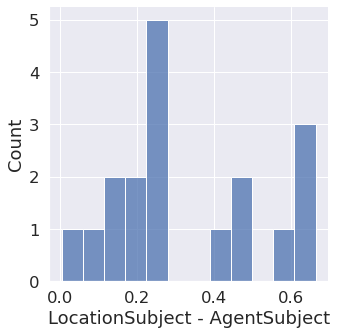

In [40]:
sns.displot(item_differences, bins=12)

In [41]:
item_differences.sort_values(ascending=False)

item_id  A             V       L             A concrete?  A countable?
24.0     frogs         hopp    swamp         True         True            0.662494
8.0      cockroaches   creep   cave          True         True            0.630745
56.0     tadpoles      swimm   pond          True         True            0.612169
2.0      ants          crawl   table         True         True            0.588018
19.0     bubbles       foam    tub           True         True            0.489983
17.0     debris        flow    river         True         False           0.486287
22.0     lights        glow    sky           True         True            0.411585
5.0      conversation  buzz    room          False        False           0.276449
3.0      trumpets      ring    concert hall  True         True            0.273135
25.0     energy        humm    market        False        False           0.251926
64.0     worms         wriggl  bucket        True         True            0.241537
4.0      people 

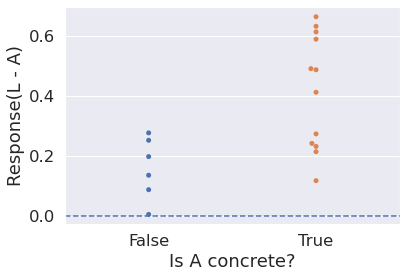

In [42]:
column_mapping = {
    "A concrete?": "Is A concrete?",
    "LocationSubject - AgentSubject": "Response(L - A)"
}
sns.swarmplot(data=item_differences.reset_index().rename(columns=column_mapping), x=column_mapping["A concrete?"], y=column_mapping["LocationSubject - AgentSubject"])
plt.axhline(0, linestyle="--")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'frogs hopp'),
  Text(1, 0, 'cockroaches creep'),
  Text(2, 0, 'tadpoles swimm'),
  Text(3, 0, 'ants crawl'),
  Text(4, 0, 'bubbles foam'),
  Text(5, 0, 'debris flow'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'conversation buzz'),
  Text(8, 0, 'trumpets ring'),
  Text(9, 0, 'energy humm'),
  Text(10, 0, 'worms wriggl'),
  Text(11, 0, 'people bustl'),
  Text(12, 0, 'sewage runn'),
  Text(13, 0, 'excitement puls'),
  Text(14, 0, 'excitement crackl'),
  Text(15, 0, 'bees swarm'),
  Text(16, 0, 'fear prickl'),
  Text(17, 0, 'terror cours')])

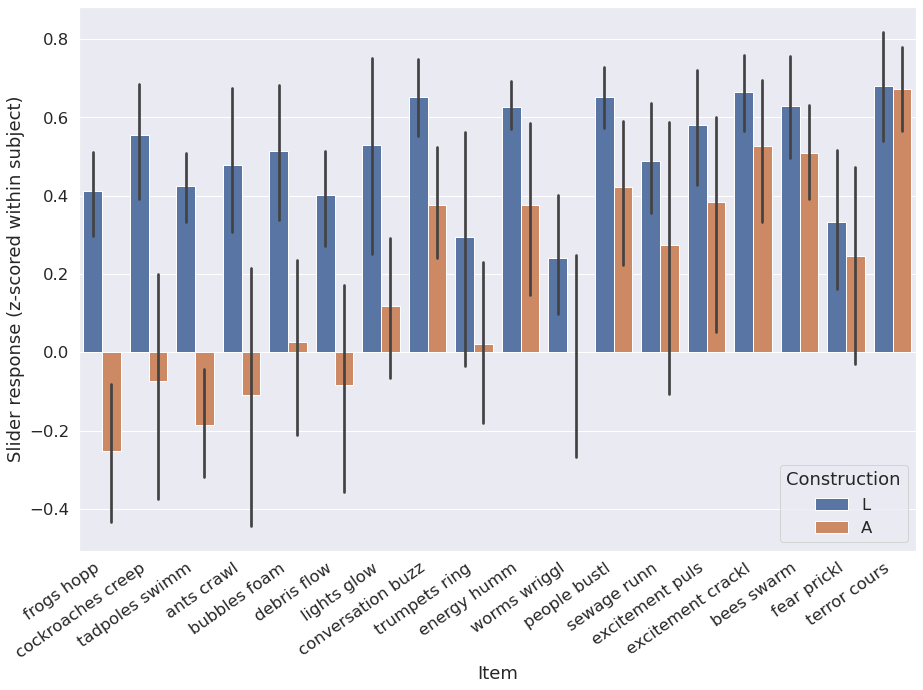

In [43]:
plt.subplots(figsize=(15, 10))
to_plot = merged_df.copy()
to_plot["Construction"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
column_mappings = {
    "AV": "Item",
    "slider_value_normed": "Slider response (z-scored within subject)",
}
order = to_plot.groupby("AV").apply(lambda xs: xs[xs.agent_is_subject].slider_value_normed.mean() - xs[~xs.agent_is_subject].slider_value_normed.mean()).sort_values().index
sns.barplot(data=to_plot.reset_index().rename(columns=column_mappings), x=column_mappings["AV"], hue="Construction", y=column_mappings["slider_value_normed"], order=order)
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

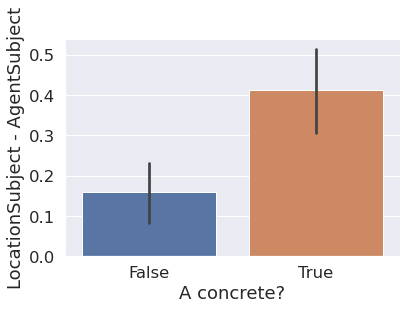

In [44]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

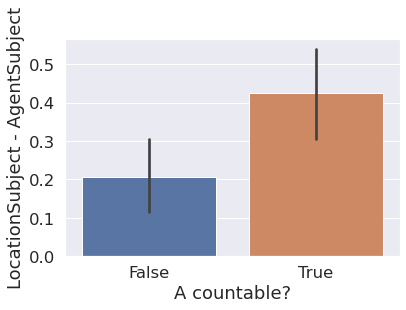

In [45]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [46]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.05, 0.95])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
item_bootstrap_df

,low,high
item_id,,
0.0,-0.186430,-0.097875
2.0,-0.111976,0.103857
3.0,-0.467003,-0.220023
4.0,-0.074418,-0.001588
5.0,-0.020932,0.064039
6.0,-0.298907,-0.204762
7.0,-0.214112,-0.117454
8.0,0.120347,0.251618
17.0,-0.024192,0.135696


In [47]:
item_bootstrap_df = \
    pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
             left_index=True, right_index=True).sort_values("low", ascending=False)

In [48]:
item_bootstrap_df.sort_values("low", ascending=False)

,low,high,A,V,AV,L
item_id,,,,,,
56,0.322686,0.416164,tadpoles,swimm,tadpoles swimm,pond
24,0.297106,0.404140,frogs,hopp,frogs hopp,swamp
8,0.120347,0.251618,cockroaches,creep,cockroaches creep,cave
5,-0.020932,0.064039,conversation,buzz,conversation buzz,room
17,-0.024192,0.135696,debris,flow,debris flow,river
19,-0.038082,0.137816,bubbles,foam,bubbles foam,tub
4,-0.074418,-0.001588,people,bustl,people bustl,square
2,-0.111976,0.103857,ants,crawl,ants crawl,table
25,-0.118740,-0.015818,energy,humm,energy humm,market


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'tadpoles swimm'),
  Text(1, 0, 'frogs hopp'),
  Text(2, 0, 'cockroaches creep'),
  Text(3, 0, 'conversation buzz'),
  Text(4, 0, 'debris flow'),
  Text(5, 0, 'bubbles foam'),
  Text(6, 0, 'people bustl'),
  Text(7, 0, 'ants crawl'),
  Text(8, 0, 'energy humm'),
  Text(9, 0, 'bees swarm'),
  Text(10, 0, 'excitement crackl'),
  Text(11, 0, 'excitement puls'),
  Text(12, 0, 'worms wriggl'),
  Text(13, 0, 'lights glow'),
  Text(14, 0, 'terror cours'),
  Text(15, 0, 'sewage runn'),
  Text(16, 0, 'fear prickl'),
  Text(17, 0, 'trumpets ring')])

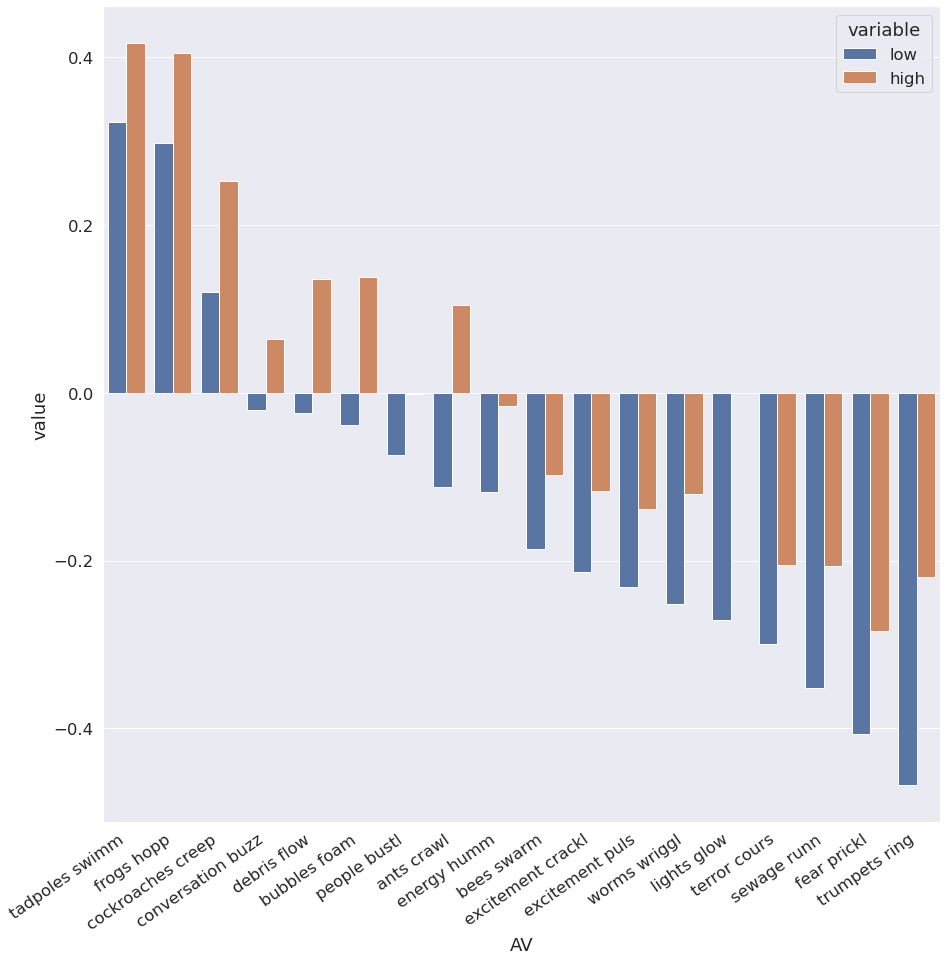

In [49]:
plt.subplots(figsize=(15, 15))
sns.barplot(
    data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
    x="AV", y="value", hue="variable")
plt.xticks(rotation=35, ha="right")

### Copouts

In [50]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [51]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout             sum  count      mean
item_id agent_is_subject                      
56.0    False               1     11  0.090909
30.0    True                1     12  0.083333
64.0    False               1     13  0.076923
25.0    True                1     13  0.076923
0.0     False               0     13  0.000000
31.0    False               0      9  0.000000
24.0    False               0     12  0.000000
        True                0     12  0.000000
25.0    False               0     11  0.000000
30.0    False               0     12  0.000000
31.0    True                0     15  0.000000
0.0     True                0     11  0.000000
39.0    False               0     14  0.000000
        True                0     10  0.000000
56.0    True                0     13  0.000000
64.0    True                0     11  0.000000
6.0     True                0     10  0.000000
22.0    True                0     15  0.000000
        False               0      9  0.000000
19.0    True                0     11  0.000000
5.0     False               0     11  0.000000
2.0     False               0     14  0.000000
        True                0     10  0.000000
3.0     False               0     13  0.000000
        True                0     10  0.000000
4.0     False               0     14  0.000000
        True                0     10  0.000000
5.0     True                0     13  0.000000
19.0    False               0     12  0.000000
6.0     False               0     13  0.000000
7.0     False               0     16  0.000000
        True                0      8  0.000000
8.0     True                0     12  0.000000
17.0    False               0     12  0.000000
        True                0     12  0.000000
8.0     False               0     12  0.000000

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

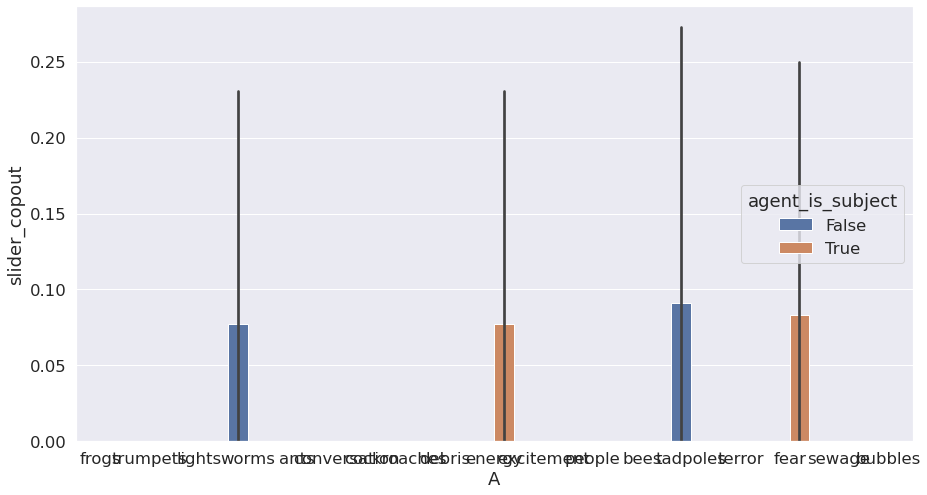

In [52]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

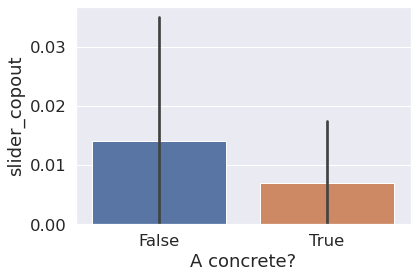

In [53]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

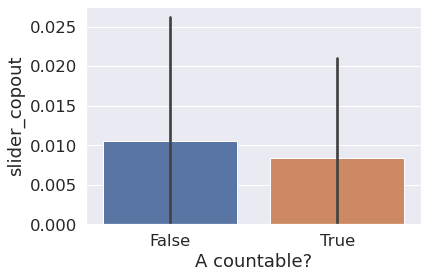

In [54]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

### Item exposure

In [55]:
merged_df.groupby(["item_id", "A", "agent_is_subject"]).size().sort_values()

item_id  A             agent_is_subject
7.0      excitement    True                 8
31.0     excitement    False                9
22.0     lights        False                9
2.0      ants          True                10
39.0     sewage        True                10
3.0      trumpets      True                10
4.0      people        True                10
6.0      terror        True                10
64.0     worms         True                11
25.0     energy        False               11
5.0      conversation  False               11
56.0     tadpoles      False               11
0.0      bees          True                11
19.0     bubbles       True                11
30.0     fear          True                12
24.0     frogs         True                12
                       False               12
30.0     fear          False               12
17.0     debris        True                12
                       False               12
8.0      cockroaches   True             

## Extras

In [56]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

,trial_index,materials_id,item_id,condition_0,condition_1,agent_is_subject,slider_value,A,V,L
0,9,swarm-002-promptP,25.0,0.0,0.0,False,63.0,energy,humm,market
25,34,swarm-002-promptP,22.0,0.0,0.0,False,82.0,lights,glow,sky
23,32,swarm-002-promptP,8.0,filler,full,False,58.0,cockroaches,creep,cave
20,29,swarm-002-promptP,56.0,0.0,0.0,False,47.0,tadpoles,swimm,pond
19,28,swarm-002-promptP,24.0,0.0,0.0,False,78.0,frogs,hopp,swamp
17,26,swarm-002-promptP,1.0,filler,empty,False,61.0,voices,echo,church
15,24,swarm-002-promptP,11.0,filler,full,False,79.0,lava,erupt,volcano
27,36,swarm-002-promptP,6.0,filler,full,False,67.0,terror,cours,body
14,23,swarm-002-promptP,6.0,0.0,0.0,False,95.0,terror,cours,body
18,27,swarm-002-promptP,3.0,filler,empty,False,NaN,trumpets,ring,concert hall


In [57]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])

,,agent_is_subject,slider_value_normed
trial_index,uniqueid,,
12,A1R780RJYQ68GY:35DR22AR5E84NWVLZHKZHDCFK633XQ,False,-1.213383
13,A3CGQOJC28OVGN:3ZQIG0FLQF49A5SE9MUJYPQR2UVVW3,False,-0.547382
17,A37EUJ2M9I0VLE:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X,False,0.015878
28,AJXIC6Q5EM76P:3K4J6M3CXFHTLVZGJMZ5GZQQNRDGAN,False,0.282717
30,A1FVXS8IM5QYO8:3HHRAGRYX9T38P69FZYDPDO880DO94,False,0.315556
37,AY9UWGHEE2P04:3IUZPWIU1PVVUUY2AIGCWGFAMQIWK0,False,0.435148
20,A2INXY39KBM92F:3570Y55XZQ7UHDXJZSDLJL8XQIFYGE,False,0.436982
19,A2VNSNAN1LZBAM:37M28K1J0R13CXPHRSK8DCI6FJ5JA5,False,0.606225
23,A9HQ3E0F2AGVO:3TYCR1GOTD7A8VLP65CKAKM7SYXLZ0,False,0.606275
